# Исследование участия пользователей в голосованиях в Wikipedia

**Нам предоставлены данные с информацией о результатах голосования пользователей Wikipedia. На их основе мы проведем анализ активности пользователей, выявим их предпочтения, сделаем сегментацию по различным критериям. Известно, что выборы проводятся каждые полгода. Побеждают кандидаты, которые набирают 2/3 голосов "за". Избирается комиссия (ареопаг), обладающая особыми правами в решении споров о банах/разбанах пользователей или статей.**

**Цель проекта: изучить данные, привести их в пригодный для анализа вид, найти интересные закономерности и инсайты.**

**Нам предоставлен csv-файл 'stats' с информацией о пользователях и csv-файл 'votes' с информацией о голосовании.**

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import plotly.express as px

 ## Загрузка данных из датасета 'stats'

In [2]:
#читаем excel-файл stats
file_path_1 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Исследование участия пользователей в голосованиях в Wikipedia\stats.xlsx'
stats = pd.read_excel(file_path_1)

In [3]:
stats.head()

,Edits,Reverts,Log,Diff,Volume,Tot size,Time,Speed,User,txt
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708


In [4]:
#выведем основную информацию о датафрейме
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edits     28950 non-null  int64  
 1   Reverts   10157 non-null  float64
 2   Log       28306 non-null  float64
 3   Diff      28945 non-null  object 
 4   Volume    28945 non-null  object 
 5   Tot size  28945 non-null  object 
 6   Time      28950 non-null  object 
 7   Speed     28950 non-null  object 
 8   User      28950 non-null  object 
 9   txt       28950 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.2+ MB


**В изучаемом нами датафрейме 10 колонок и 28949 строк.**

## Предобработка данных датасета 'stats'

In [5]:
# приведем названия столбцов к нижнему регистру
new_stats_column_names = {
    'Edits': 'edits',
    'Reverts': 'reverts',
    'Log': 'log',
    'Diff': 'diff',
    'Volume': 'volume',
    'Tot size': 'tot_size',
    'Time': 'time',
    'Speed': 'speed',
    'User': 'user',
    'txt': 'text'
}

# используем метод rename для переименования столбцов
stats.rename(columns=new_stats_column_names, inplace=True)

In [6]:
stats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,text
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708


In [7]:
#изменим тип данных в столбцах 'reverts' и 'log' на целочисленный для удобства
stats['reverts'] = stats['reverts'].fillna(0).astype(int)
stats['log'] = stats['log'].fillna(0).astype(int)

In [8]:
#поменяем формат данных в столбце 'text'
stats['text'] = pd.to_datetime(stats['text'], format='%d%m%y', errors='coerce')

In [9]:
#уберем из столбца 'time' обозначение 'h' и изменим тип данных
stats['time'] = stats['time'].str.extract('(\d+)').astype(float)

In [10]:
#посмотрим на уникальные значения в столбце со скоростью внесения правок
stats['speed'].unique()

array(['34/h', '24/h', '26/h', '19/h', '18/h', '15/h', '22/h', '17/h',
       '23/h', '32/h', '14/h', '28/h', '20/h', '16/h', '29/h', '13/h',
       '21/h', '27/h', '12/h', '25/h', '11/h', '30/h', '39/h', '47/h',
       '48/h', '38/h', '2/m', '46/h', '36/h', '35/h', '41/h', '1/m',
       '59/h', '31/h', '33/h', '49/h', '42/h', '40/h', '7/m', '52/h',
       '10/h', '53/h', '37/h', '45/h', '4/m', '43/h', '50/h', '44/h',
       '58/h', '57/h', '54/h', '3/m', '56/h', '51/h', '55/h', '5/m',
       '8/m', '10/m', '60/h', '12/m', '13/m', '18/m', '15/m', '9/m',
       '9/h', '72/m', '295/m', '11/m', '6/m', '377/m', '16/m', '76/m'],
      dtype=object)

**Переведем все значения по скорости внесения правок в минуты.**

In [11]:
# Функция для извлечения числовых значений и конвертации в минуты с округлением до 2 знаков после запятой
def convert_speed(speed):
    if '/h' in speed:
        # Извлекаем числовое значение, делим на 60 для преобразования часов в минуты и округляем до 2 знаков после запятой
        return '{:.2f}/m'.format(float(speed.split('/')[0]) / 60)
    elif '/m' in speed:
        # Значение уже в минутах, оставляем как есть
        return speed
    else:
        return None

# Применяем функцию к столбцу 'speed' и изменяем его значения
stats['speed'] = stats['speed'].apply(convert_speed)

In [12]:
# Удаляем все символы кроме цифр и точки из столбца 'speed'
stats['speed'] = stats['speed'].str.replace(r'[^\d.]+', '', regex=True)
# Преобразовываем столбец 'speed' в формат float
stats['speed'] = pd.to_numeric(stats['speed'], errors='coerce')

# Форматируем значения в столбце 'speed' с двумя знаками после запятой
stats['speed'] = stats['speed'].apply(lambda x: '{:.2f}'.format(x) if not pd.isna(x) else x)
stats['speed'].unique()

array(['0.57', '0.40', '0.43', '0.32', '0.30', '0.25', '0.37', '0.28',
       '0.38', '0.53', '0.23', '0.47', '0.33', '0.27', '0.48', '0.22',
       '0.35', '0.45', '0.20', '0.42', '0.18', '0.50', '0.65', '0.78',
       '0.80', '0.63', '2.00', '0.77', '0.60', '0.58', '0.68', '1.00',
       '0.98', '0.52', '0.55', '0.82', '0.70', '0.67', '7.00', '0.87',
       '0.17', '0.88', '0.62', '0.75', '4.00', '0.72', '0.83', '0.73',
       '0.97', '0.95', '0.90', '3.00', '0.93', '0.85', '0.92', '5.00',
       '8.00', '10.00', '12.00', '13.00', '18.00', '15.00', '9.00',
       '0.15', '72.00', '295.00', '11.00', '6.00', '377.00', '16.00',
       '76.00'], dtype=object)

In [13]:
# Преобразовываем столбец 'speed' в формат float
stats['speed'] = stats['speed'].astype(float)

In [14]:
stats['speed'].unique()

array([5.70e-01, 4.00e-01, 4.30e-01, 3.20e-01, 3.00e-01, 2.50e-01,
       3.70e-01, 2.80e-01, 3.80e-01, 5.30e-01, 2.30e-01, 4.70e-01,
       3.30e-01, 2.70e-01, 4.80e-01, 2.20e-01, 3.50e-01, 4.50e-01,
       2.00e-01, 4.20e-01, 1.80e-01, 5.00e-01, 6.50e-01, 7.80e-01,
       8.00e-01, 6.30e-01, 2.00e+00, 7.70e-01, 6.00e-01, 5.80e-01,
       6.80e-01, 1.00e+00, 9.80e-01, 5.20e-01, 5.50e-01, 8.20e-01,
       7.00e-01, 6.70e-01, 7.00e+00, 8.70e-01, 1.70e-01, 8.80e-01,
       6.20e-01, 7.50e-01, 4.00e+00, 7.20e-01, 8.30e-01, 7.30e-01,
       9.70e-01, 9.50e-01, 9.00e-01, 3.00e+00, 9.30e-01, 8.50e-01,
       9.20e-01, 5.00e+00, 8.00e+00, 1.00e+01, 1.20e+01, 1.30e+01,
       1.80e+01, 1.50e+01, 9.00e+00, 1.50e-01, 7.20e+01, 2.95e+02,
       1.10e+01, 6.00e+00, 3.77e+02, 1.60e+01, 7.60e+01])

**Теперь напишем функцию для преобразования столбцов 'diff', 'volume', 'tot_size' к типу float и переведем все данные в них в килобайты (k).**

In [15]:
# Функция для преобразования значения в числовой формат
def convert_volume(value):
    if isinstance(value, str):  # Проверяем, является ли значение строкой
        # Удаление всех пробелов, включая неразрываемый пробел
        value = value.replace(' ', '').replace('\xa0', '')
        
        if 'M' in value:
            return float(value.replace('M', '')) * 1000
        elif 'k' in value:
            return float(value.replace('k', ''))
    return None  # Если значение не является строкой или не содержит 'M' или 'k', возвращаем None

**Применим написанную функцию к столбцам.**

In [16]:
stats['diff'] = stats['diff'].apply(convert_volume)

In [17]:
stats['volume'] = stats['volume'].apply(convert_volume)

In [18]:
stats['tot_size'] = stats['tot_size'].apply(convert_volume)

In [19]:
#взглянем на полученную в результате предобработки таблицу
stats.head(10)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,text
0,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20
1,1809,0,1328,395.0,2800.0,42000.0,129.0,0.40,Obersachse,2008-07-20
2,2734,0,0,16.0,15.0,19000.0,105.0,0.43,Monegasque~ruwiki,2008-07-20
3,2611,0,6,278.0,350.0,43000.0,135.0,0.32,User№101,2008-07-20
4,917,6,1416,154.0,1200.0,26000.0,98.0,0.40,Kalan,2008-07-20
5,2000,0,259,443.0,614.0,36000.0,125.0,0.30,Vizu,2008-07-20
6,2100,0,5,377.0,564.0,45000.0,137.0,0.25,Michael Romanov,2008-07-20
7,2069,0,27,879.0,938.0,22000.0,79.0,0.43,Ekamaloff,2008-07-20
8,1884,7,18,318.0,1400.0,43000.0,84.0,0.37,The Wrong Man,2008-07-20
9,1800,0,32,545.0,873.0,20000.0,104.0,0.30,Zimin.V.G.,2008-07-20


In [20]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   edits     28950 non-null  int64         
 1   reverts   28950 non-null  int32         
 2   log       28950 non-null  int32         
 3   diff      28850 non-null  float64       
 4   volume    28936 non-null  float64       
 5   tot_size  28945 non-null  float64       
 6   time      28950 non-null  float64       
 7   speed     28950 non-null  float64       
 8   user      28950 non-null  object        
 9   text      9750 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1)
memory usage: 2.0+ MB


In [21]:
#проверим, нет ли явных дубликатов
stats.duplicated().sum()

0

## Загрузка данных из датасета 'votes'

In [22]:
#читаем excel-файл votes
file_path_2 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Исследование участия пользователей в голосованиях в Wikipedia\votes.xlsx'
votes = pd.read_excel(file_path_2)

In [23]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611


In [24]:
#выведем основную информацию о датафрейме
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


**В изучаемом нами датафрейме 7 колонок и 79074 строки.**

## Предобработка данных из датасета 'votes'

In [25]:
# приведем названия столбцов к нижнему регистру
new_votes_column_names = {
    'voter': 'voter',
    'can_vote': 'can_vote',
    'time': 'time',
    'candidate': 'candidate',
    'n': 'n',
    'vote': 'vote',
    'lt': 'lt'
}

# используем метод rename для переименования столбцов
votes.rename(columns=new_votes_column_names, inplace=True)

In [26]:
votes.head()

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611


In [27]:
#поменяем тип данных у столбца 'time'
votes['time'] = pd.to_datetime(votes['time'])

In [28]:
#проверим, всё ли в порядке со столбцом 'vote', нет ли там каких-либо аномальных значений
votes[(votes['vote'] != 1) & (votes['vote'] != -1)]

,voter,can_vote,time,candidate,n,vote,lt


In [29]:
#проверим, нет ли явных дубликатов
votes.duplicated().sum()

0

# Исследовательский анализ данных

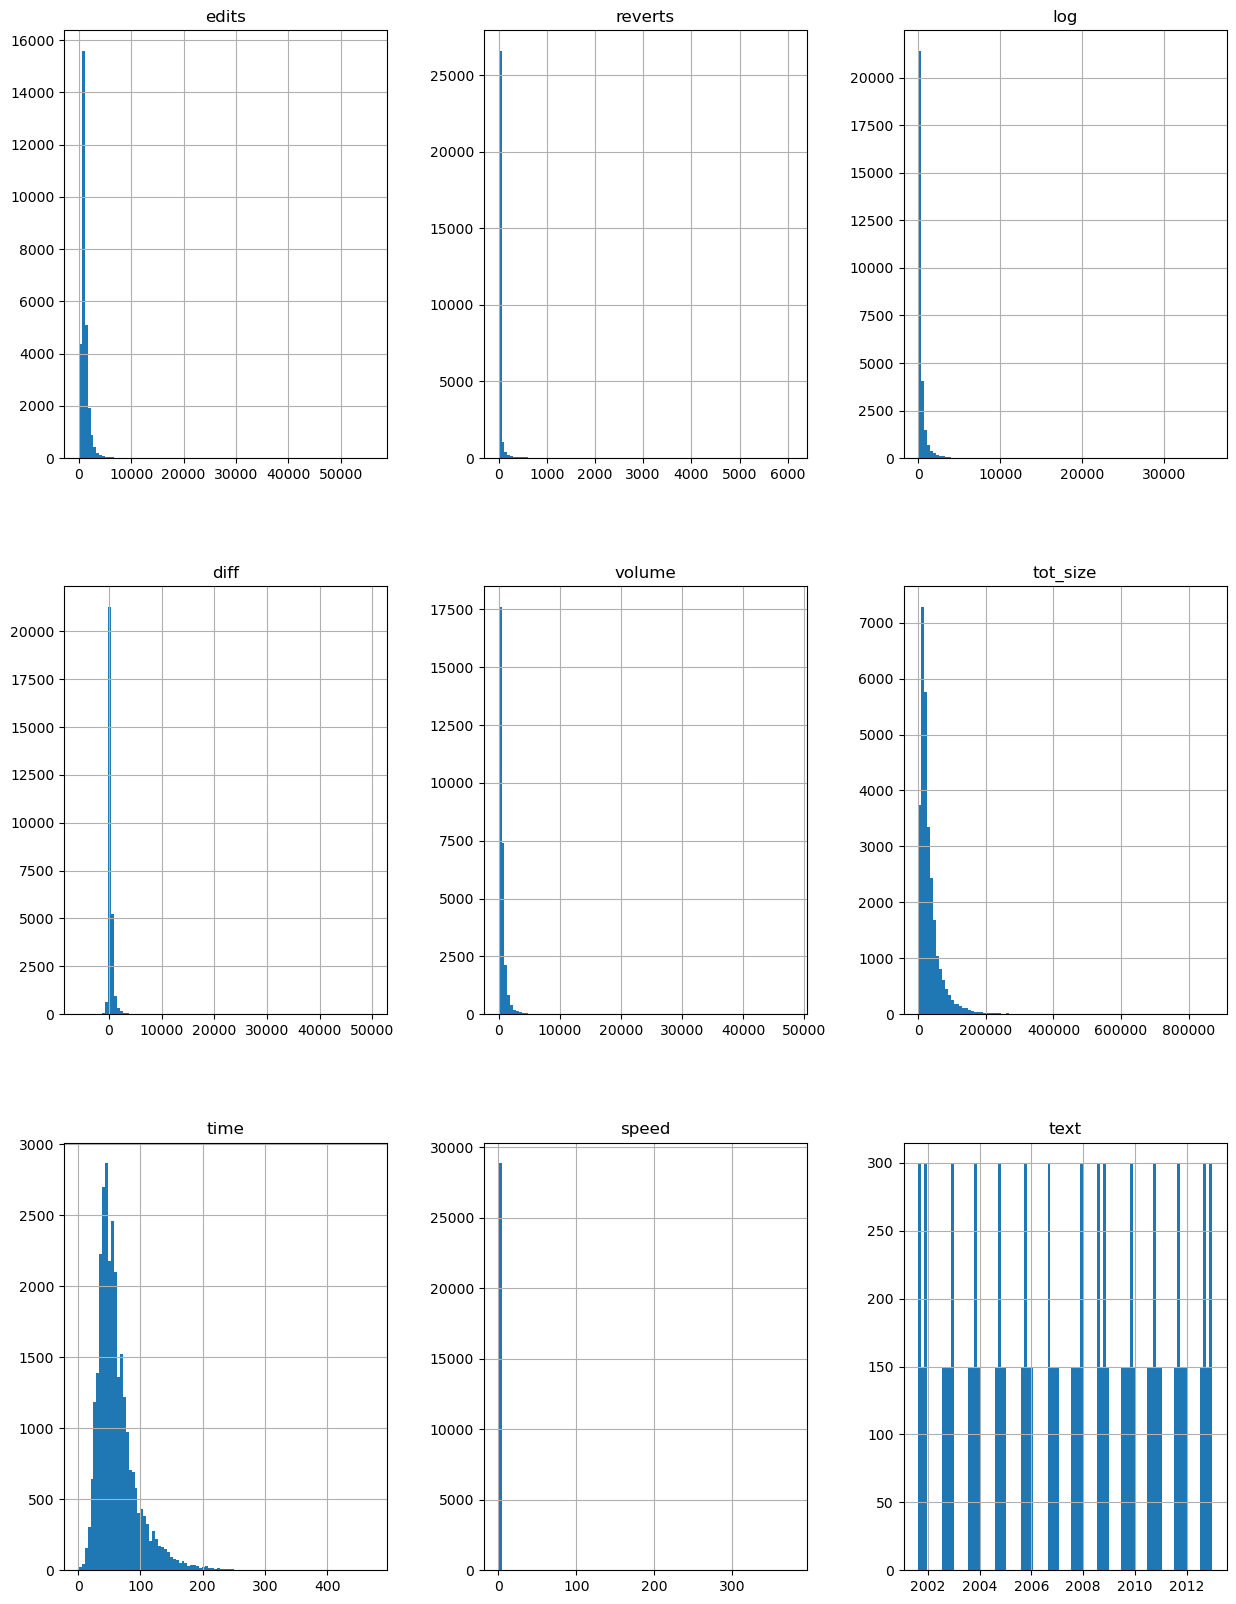

In [30]:
#Построим общую гистограмму для всех числовых столбцов таблицы stats
stats.hist(figsize=(15, 20), bins=100);

**Можем сделать вывод, что преобладающее большинство пользователей сделали более чем по 15 тыс. правок, отменили более 25 тыс. чужих правок. Также по гистограмме столбца 'volume' мы видим, что очень многие пользователи добавили себе порядка 17,5 тыс. килобайт информации, и они провели в сервисе порядка 50-ти часов.**

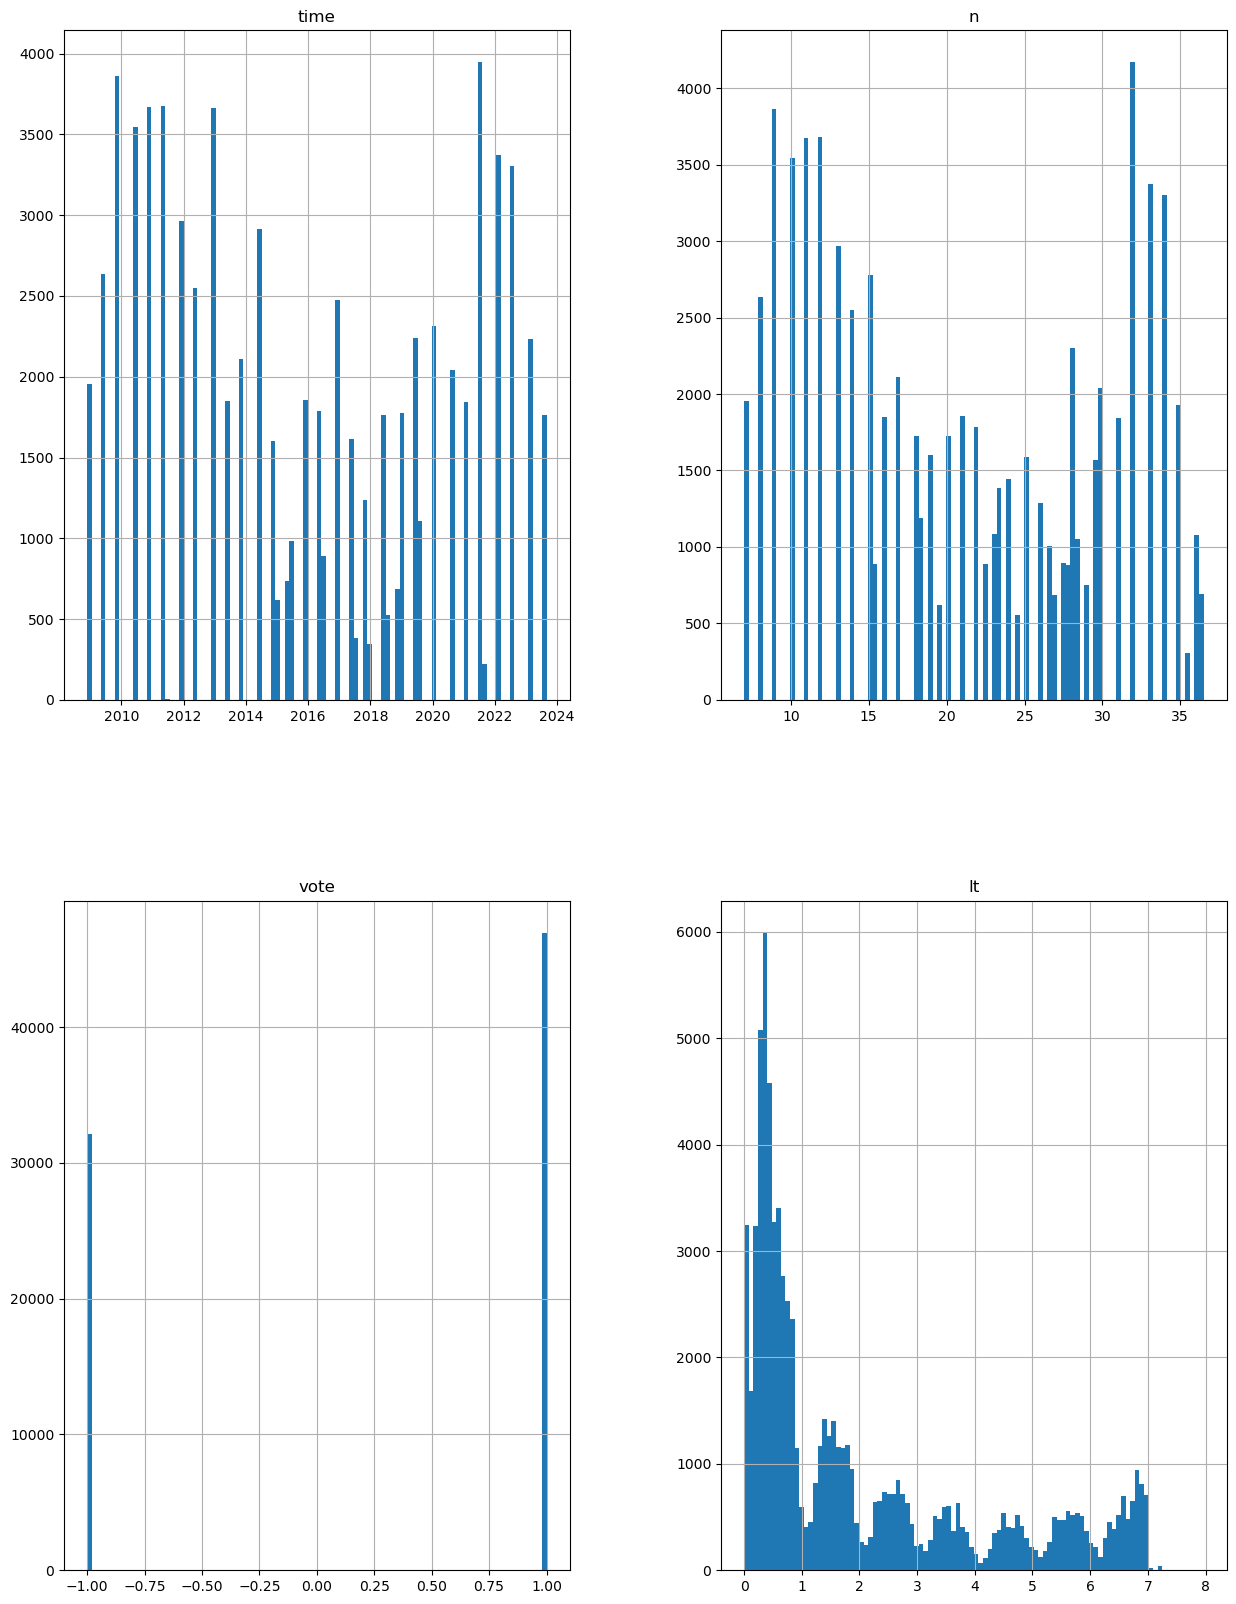

In [31]:
#Построим общую гистограмму для всех числовых столбцов таблицы votes
votes.hist(figsize=(15, 20), bins=100);

**По вышепредставленным гистограммам можно сделать вывод, что активнее всего голосовали в 2009-м и 2021-м годах; чаще голосующие голосовали "за" чем "против"; большинство избирателей предпочитали отдавать свой голос в первые сутки после начала выборов, в последние сутки количество голосующих немного увеличивалось, т.к. по-видимому некоторые люди пытались успеть проголосовать в последний момент.**

**Для выполнения дальнейшего анализа нам необходимо объединить две таблицы в одну.**

In [32]:
#для этого сначала переименуем столбец 'voter' в таблице votes
votes = votes.rename(columns={'voter': 'user'})

In [33]:
# также изменим название столбца 'time' в таблицах, чтобы не было столбцов с одинаковыми названиями
stats = stats.rename(columns ={'time': 'time_online'})
votes = votes.rename(columns ={'time': 'vote_time'})

In [34]:
#объединим две таблицы с данными в одну
df = pd.merge(stats, votes, on='user', how='inner')

In [35]:
#посмотрим, все ли в порядке
df.head()

,edits,reverts,log,diff,volume,tot_size,time_online,speed,user,text,can_vote,vote_time,candidate,n,vote,lt
0,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
1,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
2,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
3,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611
4,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691595 entries, 0 to 1691594
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   edits        int64         
 1   reverts      int32         
 2   log          int32         
 3   diff         float64       
 4   volume       float64       
 5   tot_size     float64       
 6   time_online  float64       
 7   speed        float64       
 8   user         object        
 9   text         datetime64[ns]
 10  can_vote     bool          
 11  vote_time    datetime64[ns]
 12  candidate    object        
 13  n            float64       
 14  vote         int64         
 15  lt           float64       
dtypes: bool(1), datetime64[ns](2), float64(7), int32(2), int64(2), object(2)
memory usage: 195.2+ MB


**Выведем и визуализируем ТОП-20 голосующих по количеству отданных голосов.**

In [37]:
top_voters = df.groupby('user')['vote'].count().sort_values(ascending=False).head(20)
top_voters

user
Vladimir Solovjev               46284
NBS                             38150
Schekinov Alexey Victorovich    34881
Dmartyn80                       30488
ShinePhantom                    30099
MBH                             29459
Bff                             27861
Daphne mesereum                 27775
Джекалоп                        26586
Ghirlandajo                     25654
Sigwald                         24408
Deinocheirus                    24108
Pessimist2006                   23976
Андрей Романенко                21855
Adavyd                          21294
El-chupanebrej                  20237
Tempus                          18762
Ле Лой                          16590
Wulfson                         16555
Pavel Alikin                    15753
Name: vote, dtype: int64

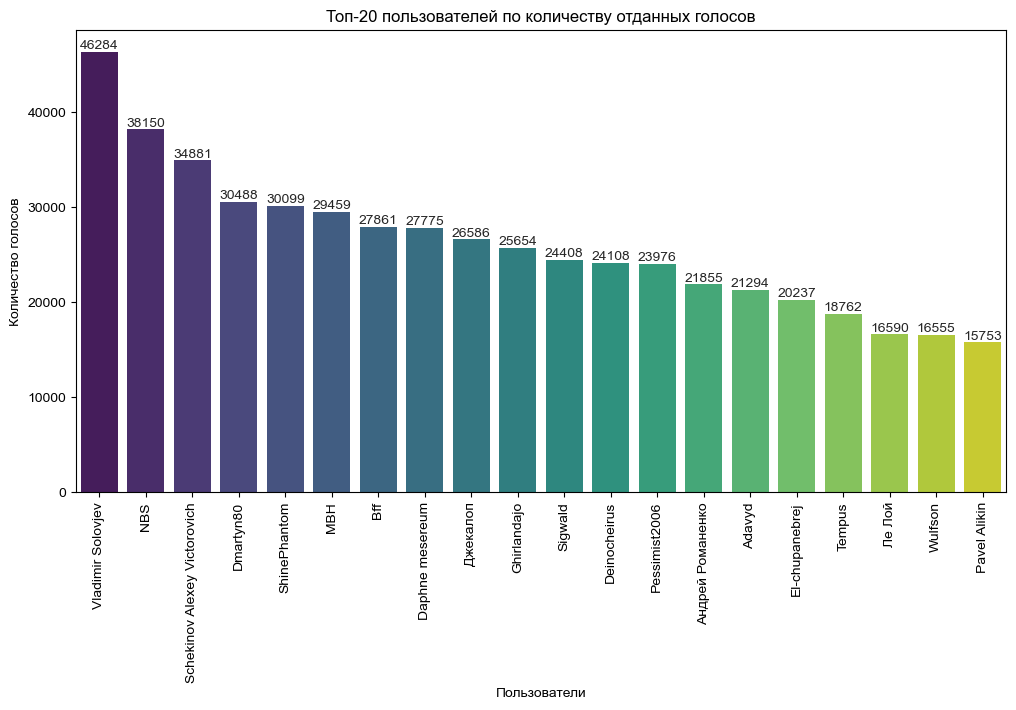

In [38]:
# Создаем столбчатую диаграмму с Seaborn
plt.figure(figsize=(12, 6))  # Размер графика
sns.barplot(x=top_voters.index, y=top_voters.values, palette="viridis")  # Создаем столбцы с данными и указываем палитру цветов
plt.xlabel('Пользователи')  # Подпись оси x
plt.ylabel('Количество голосов')  # Подпись оси y
plt.title('Топ-20 пользователей по количеству отданных голосов')  # Заголовок графика
plt.xticks(rotation=90)  # Поворачиваем подписи по оси x для лучшей читаемости
sns.set(style="whitegrid")  # Включаем сетку

# Добавляем подписи с количеством голосов над каждым столбцом
for index, value in enumerate(top_voters.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

**С помощью столбчатой диаграммы мы наглядно видим, что самыми голосующими пользователями были Vladimir Solovjev, NBS и Schekinov Alexey Victorovich.**

**Теперь определим ТОП-10 лидеров по скорости внесения правок.**

In [39]:
top_edit_speed = df.groupby('user')['speed'].max().sort_values(ascending=False).head(10)
top_edit_speed

user
TakingOver          76.0
Vodolaz             16.0
Putnik              11.0
Jack Jackie Pomi    11.0
Хинт                10.0
Загребин Илья        9.0
Vallastro            8.0
Q-bit array          8.0
Kalan                7.0
Deltahead            6.0
Name: speed, dtype: float64

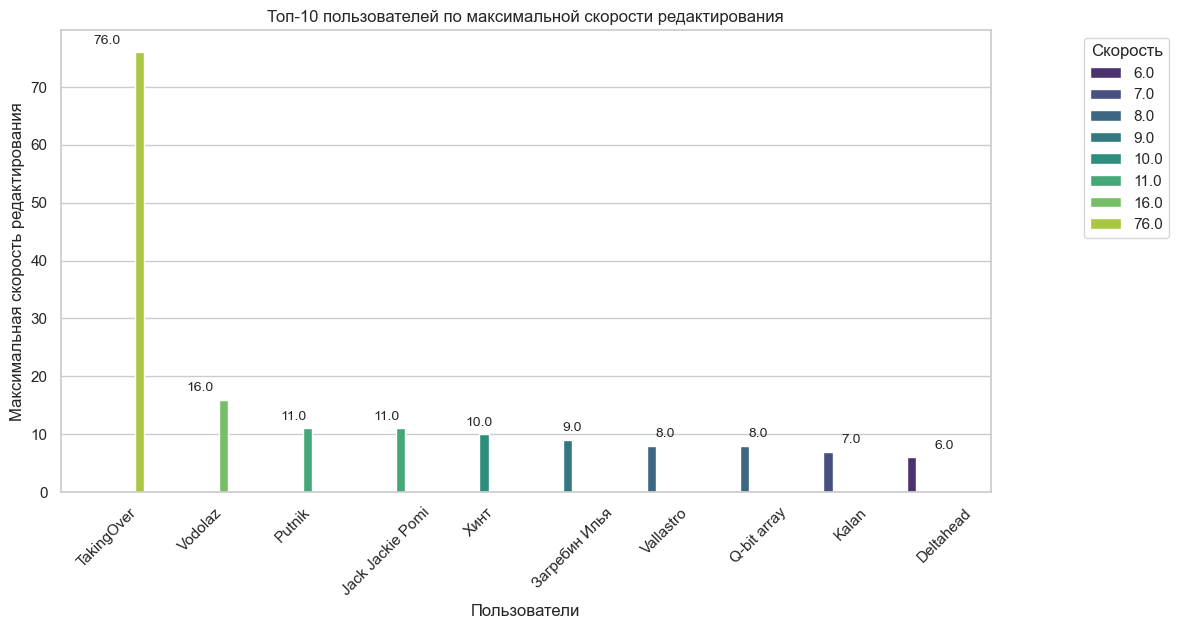

In [40]:
# Создаем столбчатую диаграмму с Seaborn, настраивая цвета по значениям 'speed'
plt.figure(figsize=(12, 6))  # Размер графика
sns.barplot(x=top_edit_speed.index, y=top_edit_speed.values, palette="viridis", hue=top_edit_speed.values)  # Создаем столбцы с данными и указываем палитру цветов
plt.xlabel('Пользователи')  # Подпись оси x
plt.ylabel('Максимальная скорость редактирования')  # Подпись оси y
plt.title('Топ-10 пользователей по максимальной скорости редактирования')  # Заголовок графика
plt.xticks(rotation=45)  # Поворачиваем подписи по оси x для лучшей читаемости
sns.set(style="whitegrid")  # Включаем сетку

# Добавляем подписи с максимальными значениями над каждым столбцом
for index, value in enumerate(top_edit_speed.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.legend(title='Скорость', loc='upper right', bbox_to_anchor=(1.2, 1.0))  # Добавляем легенду

plt.show()  # Отображаем график

**По скорости внесения правок отличился пользователь с ником TakingOver (76 правок в час!)**

**Найдем ТОП-10 пользователей по сумме всех совершенных ими за всё время правок.**

In [41]:
top_edits = df.groupby('user')['edits'].max().sort_values(ascending=False).head(10)
top_edits

user
Q-bit array            56001
MarchHare1977          35724
Mitte27                14094
Игорь Темиров          12981
Tempus                 10044
Lvova                   9041
Glovacki                8923
Bsivko                  8918
Andrzej Downarowicz     8296
Valdis72                8272
Name: edits, dtype: int64

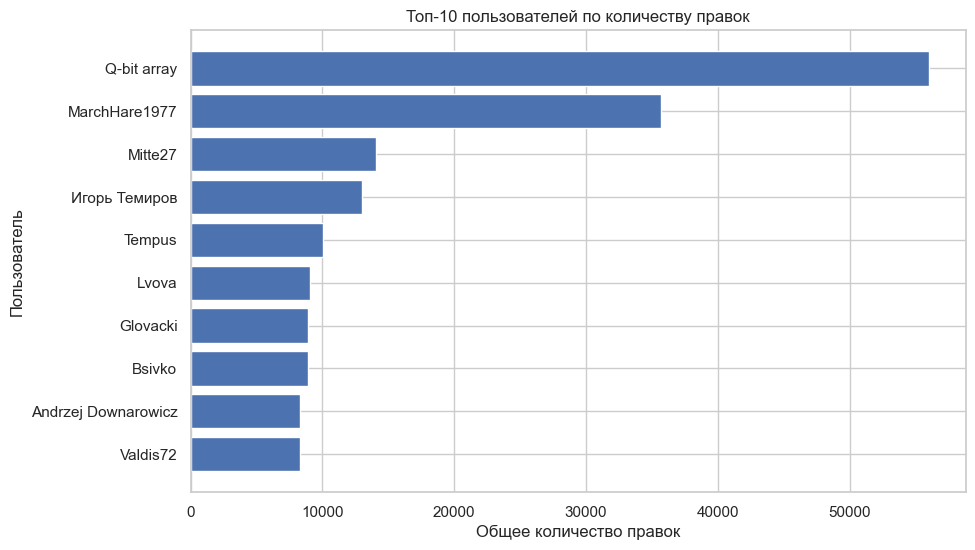

In [42]:
# Создаем график
plt.figure(figsize=(10, 6))
plt.barh(top_edits.index, top_edits.values)
plt.xlabel('Общее количество правок')
plt.ylabel('Пользователь')
plt.title('Топ-10 пользователей по количеству правок')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы пользователи с наибольшими редакциями были наверху
plt.show()

**Итак, максимальное количество правок (56001 шт.) внес Q-bit array, замыкает Топ-10 Valdis72 с 8272 правками.**

**Категоризируем пользователей по активности в голосованиях.**

In [43]:
def categorize_voter_activity(vote_count):
    if vote_count <= 500:
        return "неактивный избиратель"
    elif 501 <= vote_count <= 5000:
        return "активный избиратель"
    else:
        return "очень активный избиратель"

df['voter_category'] = df.groupby('user')['vote'].transform('count').apply(categorize_voter_activity)

In [44]:
#посмотрим, какое количество юзеров у нас попало в каждую категорию
unique_users_per_category = df.drop_duplicates('user').groupby('voter_category')['user'].count().sort_values()
unique_users_per_category

voter_category
очень активный избиратель    101
активный избиратель          253
неактивный избиратель        718
Name: user, dtype: int64

In [45]:
#проверим, сходится ли с общим количеством юзеров
df['user'].nunique()

1072

**Согласно нашим категориям выходит, что преобладают "неактивные избиратели" с количеством голосов до 500 (таких 718 человек), меньше всего людей попало в категорию "очень активных избирателей" - 101 человек. Построим визуализацию в виде круговой диаграммы.**

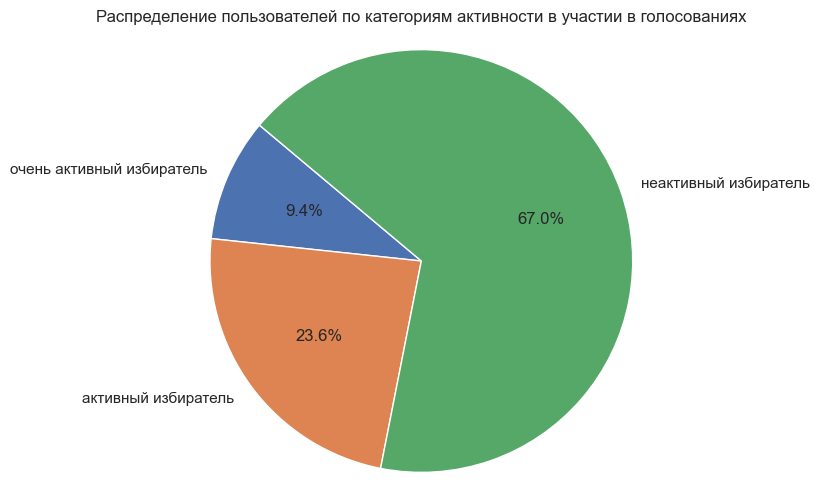

In [46]:
# Данные
categories = unique_users_per_category.index
counts = unique_users_per_category.values

# Создание круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Сделать круговую диаграмму круглой
plt.title('Распределение пользователей по категориям активности в участии в голосованиях')
plt.show()

**Категоризируем пользователей по дате их последней активности.**

In [47]:
#сначала надо определиться с диапазоном дат в датасете
df['text'].max()

Timestamp('2012-12-20 00:00:00')

In [48]:
df['text'].min()

Timestamp('2001-08-20 00:00:00')

In [49]:
def categorize_user_lifetime(text):
    try:
        text = pd.to_datetime(text)
        if text < pd.to_datetime('2005-01-01'):
            return 'бывшие пользователи'
        elif text < pd.to_datetime('2009-01-01'):
            return 'старые пользователи'
        else:
            return 'активные пользователи'
    except:
        return None

# Применяем функцию categorize_user_lifetime и сохраняем результат в 'recency_category'
df['recency_category'] = df.groupby('user')['text'].transform('max').apply(categorize_user_lifetime)


In [50]:
#проверим, что сработало как задумано
df[df['user'] == 'Altes']

,edits,reverts,log,diff,volume,tot_size,time_online,speed,user,text,can_vote,vote_time,candidate,n,vote,lt,voter_category,recency_category
0,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,активный избиратель,активные пользователи
1,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,активный избиратель,активные пользователи
2,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,активный избиратель,активные пользователи
3,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Ilya Voyager,7.0,1,0.023611,активный избиратель,активные пользователи
4,1589,0,1621,262.0,1100.0,39000.0,95.0,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Kv75,7.0,1,0.023611,активный избиратель,активные пользователи
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,402,0,770,53.0,330.0,37000.0,37.0,0.53,Altes,NaT,True,2023-02-05 14:18:00,Arsenal.UC,35.0,-1,6.595833,активный избиратель,активные пользователи
2824,402,0,770,53.0,330.0,37000.0,37.0,0.53,Altes,NaT,True,2023-02-05 14:18:00,Draa kul,35.0,1,6.595833,активный избиратель,активные пользователи
2825,402,0,770,53.0,330.0,37000.0,37.0,0.53,Altes,NaT,True,2023-02-05 14:18:00,Vyacheslav84,35.0,-1,6.595833,активный избиратель,активные пользователи
2826,402,0,770,53.0,330.0,37000.0,37.0,0.53,Altes,NaT,True,2023-08-05 21:35:00,Rampion,36.0,1,6.899306,активный избиратель,активные пользователи


In [51]:
df[df['recency_category'] == 'бывшие пользователи']['text'].max()

Timestamp('2004-12-20 00:00:00')

In [52]:
#посмотрим, какое количество юзеров у нас попало в каждую категорию
unique_users_per_recency_category = df.drop_duplicates('user').groupby('recency_category')['user'].count() \
                                     .sort_values(ascending=False)
unique_users_per_recency_category

recency_category
активные пользователи    932
старые пользователи       88
бывшие пользователи       52
Name: user, dtype: int64

**Выходит, что большинство пользователей (932 человека) оставались активными на последние годы, но некоторые не проявляли активность с 2004 года ("бывшие пользователи" - 52 человека), а некоторые после 2008 года ("старые пользователи" - 88 человек). Также не стоит забывать, что мы смогли категоризировать лишь тех избирателей, по которым была информация о датах активности в столбце 'text'. Визуализируем полученные результаты с помощью круговой диаграммы для наглядности.**

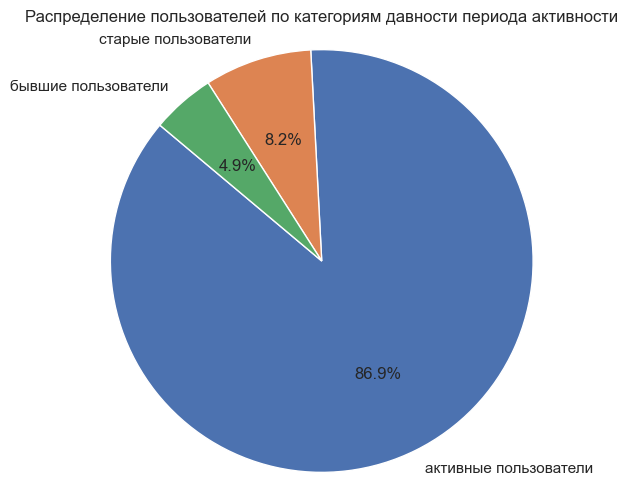

In [53]:
# Данные
categories = unique_users_per_recency_category.index
counts = unique_users_per_recency_category.values

# Создание круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Сделать круговую диаграмму круглой
plt.title('Распределение пользователей по категориям давности периода активности')
plt.show()

**Разобьем пользователей на сегменты по сумме внесенных правок.**

In [54]:
# сначала определимся с границами сегментов
user_edits = df.groupby('user')['edits'].sum()
pd.set_option('display.float_format', '{:.2f}'.format)
user_edits.describe()

count       1072.00
mean     1619631.95
std      5077431.39
min           42.00
25%        22758.00
50%       122262.50
75%       715585.25
max     66060456.00
Name: edits, dtype: float64

In [55]:
def categorize_edit(edit_sum):
    if edit_sum <= 50000:
        return "малое количество правок"
    elif 50001 <= edit_sum <= 300000:
        return "среднее количество правок"
    else:
        return "большое количество правок"

df['edit_category'] = df.groupby('user')['edits'].transform('sum').apply(categorize_edit)

In [56]:
df.groupby('user')['edits'].sum().describe()

count       1072.00
mean     1619631.95
std      5077431.39
min           42.00
25%        22758.00
50%       122262.50
75%       715585.25
max     66060456.00
Name: edits, dtype: float64

In [57]:
df.head()

,edits,reverts,log,diff,volume,tot_size,time_online,speed,user,text,can_vote,vote_time,candidate,n,vote,lt,voter_category,recency_category,edit_category
0,1589,0,1621,262.00,1100.00,39000.00,95.00,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Agent001,7.00,-1,0.02,активный избиратель,активные пользователи,большое количество правок
1,1589,0,1621,262.00,1100.00,39000.00,95.00,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Chronicler,7.00,1,0.02,активный избиратель,активные пользователи,большое количество правок
2,1589,0,1621,262.00,1100.00,39000.00,95.00,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,EvgenyGenkin,7.00,1,0.02,активный избиратель,активные пользователи,большое количество правок
3,1589,0,1621,262.00,1100.00,39000.00,95.00,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Ilya Voyager,7.00,1,0.02,активный избиратель,активные пользователи,большое количество правок
4,1589,0,1621,262.00,1100.00,39000.00,95.00,0.57,Altes,2008-07-20,True,2008-11-23 00:34:00,Kv75,7.00,1,0.02,активный избиратель,активные пользователи,большое количество правок


In [58]:
#посмотрим, какое количество юзеров у нас попало в каждую категорию
unique_users_per_edit_category = df.drop_duplicates('user').groupby('edit_category')['user'].count()
unique_users_per_edit_category

edit_category
большое количество правок    399
малое количество правок      384
среднее количество правок    289
Name: user, dtype: int64

**У нас получилось 384 человека с общим количеством правок до 50000; 289 человек с количеством правок от 50001 до 300000 и 399 человек с большим количеством правок (от 300001 правки).**

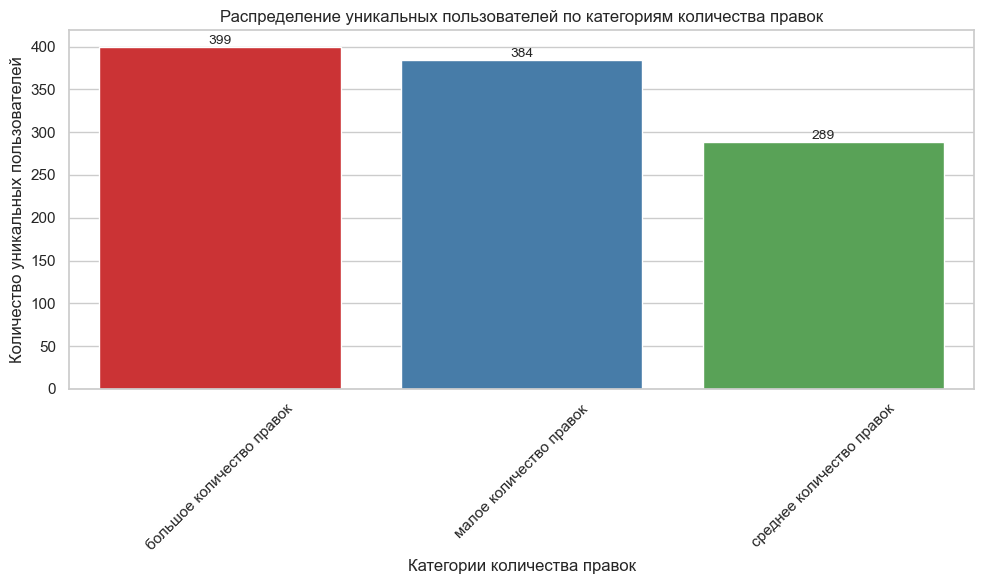

In [59]:
# Данные
categories = unique_users_per_edit_category.index
counts = unique_users_per_edit_category.values

# Создание столбчатой диаграммы с Seaborn и палитрой "Set1"
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='Set1')  # Используем палитру "Set1"
plt.xlabel('Категории количества правок')
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение уникальных пользователей по категориям количества правок')
plt.xticks(rotation=45)  # Повернуть подписи по оси x, если необходимо

# Добавление подписей над столбцами
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Определим частоту участия в голосованиях по избирателям.**

In [60]:
# Группируем данные по пользователю и находим минимальное и максимальное время голосования
user_activity = df.groupby('user')['vote_time'].agg(['min', 'max'])

# Вычисляем разницу между максимальным и минимальным временем и переводим в месяцы
user_activity['activity_duration_months'] = (user_activity['max'] - user_activity['min']).dt.days / 30

# Объединяем результат с исходным DataFrame по столбцу 'user'
df = df.merge(user_activity, on='user', how='left')

In [61]:
# выведем, сколько месяцев в сервисе присутствовал самый преданный пользователь
df[df['activity_duration_months'] == df['activity_duration_months'].max()].head(1)

,edits,reverts,log,diff,volume,tot_size,time_online,speed,user,text,...,candidate,n,vote,lt,voter_category,recency_category,edit_category,min,max,activity_duration_months
547233,564,0,7,318.00,483.00,13000.00,37.00,0.25,Ququ,2005-08-20,...,Berserkerus,7.00,1,1.86,неактивный избиратель,активные пользователи,среднее количество правок,2008-11-24 20:43:00,2023-08-30 10:29:00,179.70


**Пользователь с ником Ququ провел в сервисе уже почти 180 месяцев!**

In [62]:
# Рассчитываем среднее количество голосов в месяц для каждого пользователя и добавляем в DataFrame
df['voting_frequency'] = df.groupby('user')['vote'].transform('count') / df['activity_duration_months']

In [63]:
#посчитаем, сколько раз в месяц в среднем каждый пользователь принимал участие в голосованиях
df['voting_frequency'].median()

82.68496675959682

**Получается, что в среднем каждый избиратель голосовал по 83 раза в месяц.**

**Узнаем, сколько в среднем правок оставлял пользователь в месяц.**

In [64]:
# Рассчитываем среднее количество правок в месяц для каждого пользователя и добавляем в DataFrame
df['edits_frequency'] = df.groupby('user')['edits'].transform('max') / df['activity_duration_months']

In [65]:
#посчитаем, сколько раз в месяц в среднем каждый пользователь вносил правки
df['edits_frequency'].median()

18.14031180400891

**В среднем каждый пользователь вносил по 18 правок в месяц за изучаемый период.**

In [66]:
#посчитаем, сколько всего было выборов за промежуток времени, представленный в датасете
df['n'].unique()

array([ 7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  ,
       15.5 , 16.  , 17.  , 18.  , 18.5 , 19.  , 19.5 , 20.  , 21.  ,
       22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.5 , 27.  , 27.5 ,
       27.75, 28.  , 28.5 , 29.5 , 30.  , 31.  , 32.  , 33.  , 34.  ,
       35.  , 36.  , 22.5 , 26.  , 29.  , 26.75, 36.5 , 35.5 ])

In [67]:
df['n'].nunique()

44

In [68]:
#создадим столбец с номерами выборов без дробных частей (т.к. дробная часть означает довыборы)
df['election_number'] = df['n'].apply(np.floor).astype(int)

In [69]:
df['election_number'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [70]:
#сколько было выборов?
df['election_number'].nunique()

30

In [71]:
df['vote_time'].min()

Timestamp('2008-11-23 00:32:00')

In [72]:
df['vote_time'].max()

Timestamp('2023-08-30 20:38:00')

**Итак, мы установили, что в нашем датасете представлена информация по 30-ти выборам, которые проходили в промежуток между ноябрем 2008 года и августом 2023 года.**

In [73]:
df['candidate'].nunique()

227

**За весь изучаемый период в качестве кандидатов выступало 227 человек.**

**Создадим новый столбец 'election_result' с информацией о победе или поражении каждого кандидата.**

In [74]:
# Создаем пустой столбец 'election_result' в исходном DataFrame
df['election_result'] = ''

# Группируем данные по столбцу 'election_number'
for election_number, group in df.groupby('election_number'):
    # Группируем данные по кандидату и считаем количество голосов равных 1 и -1
    candidate_votes = group.groupby('candidate')['vote'].value_counts().unstack(fill_value=0)
    
    # Определяем условие для победы
    win_condition = candidate_votes[1] / (candidate_votes[1] + candidate_votes[-1]) >= 2/3
    
    # Обновляем столбец 'election_result' для текущей выборной кампании
    df.loc[df['election_number'] == election_number, 'election_result'] = df[df['election_number'] == election_number]['candidate'].apply(lambda x: 'выиграл' if win_condition.get(x, False) else 'проиграл')

In [75]:
# посмотрим, сколько победителей было в каждой выборной кампании
df[df['election_result'] == 'выиграл'].groupby('election_number')['candidate'].nunique()

election_number
7      6
8     11
9      8
10     8
11     8
12     7
13     6
14     8
15    10
16     6
17     6
18     8
19     6
20     6
21     8
22     5
23     5
24     7
25     7
26     5
27     4
28     6
29     6
30     6
31     7
32     6
33     6
34     5
35     5
36     7
Name: candidate, dtype: int64

In [76]:
# посмотрим, сколько проигравших было в каждой выборной кампании
df[df['election_result'] == 'проиграл'].groupby('election_number')['candidate'].nunique()

election_number
7      8
8      5
9     11
10    11
11    12
12    10
13     8
14     5
15    12
16     5
17     8
18    10
19     8
20     5
21     7
22    12
23    16
24     9
25     7
26    13
27    11
28    10
29    10
30     8
31     6
32    22
33    11
34    10
35     7
36     5
Name: candidate, dtype: int64

**Выведем информацию о том, на каких выборах какой кандидат одерживал победу.**

In [77]:
# Отфильтруем строки, где 'election_result' равно 'выиграл'
filtered_df = df[df['election_result'] == 'выиграл']

# Сгруппируем по 'candidate' и получим уникальные значения 'election_number'
unique_election_numbers = filtered_df.groupby('candidate')['election_number'].unique()
pd.set_option('display.max_rows', None)
unique_election_numbers

candidate
A.Vajrapani                             [17, 20, 15, 24]
Abiyoyo                                             [11]
Adamant.pwn                                     [30, 35]
Akim Dubrow                                         [20]
Alexander Roumega                                   [27]
Alexei Kopylov                                      [29]
Altes                                           [11, 15]
AndyVolykhov                                        [30]
Artem Korzhimanov                               [12, 10]
Bapak Alex                                          [32]
Be nt all                                       [16, 22]
Bezik                                               [21]
Biathlon                    [15, 18, 21, 23, 24, 32, 14]
Blacklake                                    [11, 13, 9]
Carn                                         [33, 8, 30]
Chronicler                                           [7]
Claymore                                             [9]
Colt browning        

**А теперь посмотрим, на скольких выборах максимум один и тот же кандидат одерживал победу.**

In [78]:
# Создадим сводную таблицу, чтобы подсчитать количество уникальных выборов, в которых каждый кандидат победил
pivot_table = filtered_df.groupby('candidate')['election_number'].nunique().reset_index()

# Отсортируем сводную таблицу по убыванию количества выборов
sorted_table = pivot_table.sort_values(by='election_number', ascending=False)
sorted_table.head()

,candidate,election_number
65,Sir Shurf,8
73,Vladimir Solovjev,8
12,Biathlon,7
67,TenBaseT,5
0,A.Vajrapani,4


**Итак, первое место по частоте избрания поделили между собой Sir Shurf и Vladimir Solovjev, их избирали в качестве членов комисии целых 8 раз! Также несильно отстал от них и пользователь Biathlon с семью избраниями.**

**На примере седьмой выборной кампании построим таймлайн, в котором можно будет посмотреть соотношение голосов "за"/"против" каждого кандидата в каждые сутки с начала выборов. При двойном нажатии на любого из кандидатов в легенде диаграммы можно вывести информацию конкретно по нему. Если кандидат имеет ratio>0, значит в этот день за него отдавали больше голосов "за", а если ratio<0, значит в этот день большинство избирателей голосовали против него.**

In [85]:
# Фильтруем данные для седьмой выборной кампании
df_election_7 = df[df['election_number'] == 7]

# Группируем данные по 'candidate', 'lt' и 'vote' и считаем количество голосов
timeline = df_election_7.groupby(['candidate', 'lt', 'vote'])['vote'].count().unstack(fill_value=0)

# Считаем количество голосов "за" и "против" для каждого дня
timeline['votes_for'] = timeline[1]
timeline['votes_against'] = -timeline[-1]

# Вычисляем соотношение "за" и "против" для каждого дня
timeline['ratio'] = timeline['votes_for'] / (timeline['votes_for'] + timeline['votes_against'])

# Сбрасываем индекс, чтобы 'candidate' и 'lt' стали обычными столбцами
timeline = timeline.reset_index()

# Создаем пользовательскую цветовую палитру
custom_palette = px.colors.qualitative.Set3  # Пример цветовой палитры

# Создаем интерактивную столбчатую диаграмму с пользовательской цветовой палитрой
fig = px.bar(timeline, x='lt', y='ratio', color='candidate',
             color_discrete_sequence=custom_palette,
             title='Изменение соотношения "За" / "Против" по каждому кандидату в каждый день выборов')
fig.update_xaxes(title='Дни с начала выборов')
fig.update_yaxes(title='Соотношение "За" / "Против"')

# Добавляем горизонтальную линию на уровне 0
fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.show()

**В седьмой выборной кампании мы можем увидеть необычную динамику в третьи сутки с начала голосования - для большинства кандидатов, за которых обычно было больше голосов "за", в эти сутки преобладали голоса "против". И вообще в эти сутки избиратели больше голосовали против кандидатов, нежели за них.**

**Также еще построим тепловую карту, где цвета строк напротив имени каждого кандидата будут отображать соотношение голосов "за" к общему количеству голосов в конкретные сутки, чтобы можно было выделить кандидатов, которых поддерживают многие избиратели.**

In [86]:
# Фильтруем данные для седьмой выборной кампании
df_election_7 = df[df['election_number'] == 7]

# Группируем данные по 'candidate', 'lt' и 'vote' и считаем количество голосов
timeline = df_election_7.groupby(['candidate', 'lt', 'vote'])['vote'].count().unstack(fill_value=0)

# Вычисляем соотношение "за" и "против" для каждого дня
timeline['ratio'] = timeline[1] / (timeline[1] + timeline[-1])

# Сбрасываем индекс, чтобы 'candidate' и 'lt' стали обычными столбцами
timeline = timeline.reset_index()

# Создаем тепловую карту (heatmap) с Plotly
fig = px.imshow(timeline.pivot(index='candidate', columns='lt', values='ratio'),
                labels={'lt': 'Дни с начала выборов', 'candidate': 'Кандидат'},
                color_continuous_scale='RdYlGn',  # Выбираем цветовую палитру
                title='Изменение соотношения "За" / "Против" по каждому кандидату в каждый день выборов')

fig.update_xaxes(side='top')  # Перемещаем ось X наверх
fig.show()

**По такому хитмэпу наглядно видно, что допустим "за" кандидата Agent001 почти не голосуют, а например за EvgenyGenkin, Ilya Voyager, Kaganer, Kv75 каждый день количество положительных голосов значительно превышает отрицательные.**

**Проверим гипотезу, что если кандидат уже приближается к победе (т.е. набрал уже 50% голосав "за"), то большая часть избирателей его поддержат.**

In [81]:
import warnings
# Отключить все предупреждения
warnings.filterwarnings("ignore")


# Группируем данные по 'election_number' и 'candidate' и считаем количество голосов ЗА ('vote' == 1) и ПРОТИВ ('vote' == -1)
votes_counts = df.groupby(['election_number', 'candidate'])['vote'].value_counts().unstack(fill_value=0)

# Определяем, какие кандидаты набрали 50% или более голосов ЗА
candidates_with_50_percent_or_more = votes_counts[(votes_counts[1] / (votes_counts[1] + votes_counts[-1])) >= 0.5].index.get_level_values('candidate').unique()

# Создаем DataFrame для хранения результата
result_df = pd.DataFrame(columns=['election_number', 'candidate', 'support_percentage_after_50_percent'])

# Для каждой выборной кампании с кандидатом, который набрал 50% или более голосов ЗА
for election_number in df['election_number'].unique():
    election_data = df[df['election_number'] == election_number]
    
    # Для каждого кандидата
    for candidate in candidates_with_50_percent_or_more:
        candidate_data = election_data[election_data['candidate'] == candidate]
        
        # Находим момент, когда кандидат набрал 50% голосов ЗА по времени отдачи голоса
        total_votes = len(candidate_data)
        votes_for_candidate = len(candidate_data[candidate_data['vote'] == 1])
        votes_against_candidate = len(candidate_data[candidate_data['vote'] == -1])
        moment_of_50_percent = None
        
        for _, row in candidate_data.iterrows():
            if (votes_for_candidate / total_votes) >= 0.5:
                moment_of_50_percent = row['vote_time']
                break
            if row['vote'] == 1:
                votes_for_candidate += 1
            else:
                votes_against_candidate += 1
            total_votes += 1
        
        if moment_of_50_percent:
            # Определяем, сколько пользователей голосовало ЗА и ПРОТИВ после момента 50%
            votes_after_50_percent = candidate_data[candidate_data['vote_time'] >= moment_of_50_percent]
            support_percentage_after_50_percent = len(votes_after_50_percent[votes_after_50_percent['vote'] == 1]) / len(votes_after_50_percent)
            
            # Добавляем данные в результат
            result_df = result_df.append({'election_number': election_number, 'candidate': candidate, 'support_percentage_after_50_percent': support_percentage_after_50_percent}, ignore_index=True)
result_df.head(10)
# В result_df содержится информация о кандидатах, которые набрали 50% или более голосов ЗА, и проценте пользователей, голосовавших ЗА кандидата после этого момента по времени отдачи голоса.

,election_number,candidate,support_percentage_after_50_percent
0,7,Chronicler,0.77
1,7,EvgenyGenkin,0.85
2,7,Ilya Voyager,0.88
3,7,Kaganer,0.93
4,7,Kv75,0.90
5,7,Pauk,0.53
6,7,Wulfson,0.66
7,7,Александр Сигачёв,0.90
8,8,Wulfson,0.82
9,8,Carn,0.93


**Посмотрим, какая доля пользователей голосовала "за" кандидата, когда он уже набирал 50% голосов в свою пользу.**

In [82]:
result_df['support_percentage_after_50_percent'].median()

0.767479674796748

**Итак, абсолютное большинство избирателей - 77% - относятся к конформистам - они поддерживали кандидата, когда видели, что он приближается к победе. Наша гипотеза подтвердилась.**

**Также интересно узнать, в какие сутки с начала выборов предпочитает голосовать большая часть избирателей.**

In [83]:
# Применяем округление (floor) к столбцу 'lt'
df['lt'] = df['lt'].apply(np.floor)

# Группируем данные по 'lt' и считаем количество избирателей ('user')
voters_count_by_days = df.groupby('lt')['user'].count().reset_index()
voters_count_by_days

,lt,user
0,0.00,945265
1,1.00,247887
2,2.00,134397
3,3.00,92433
4,4.00,63254
5,5.00,90761
6,6.00,116626
7,7.00,972


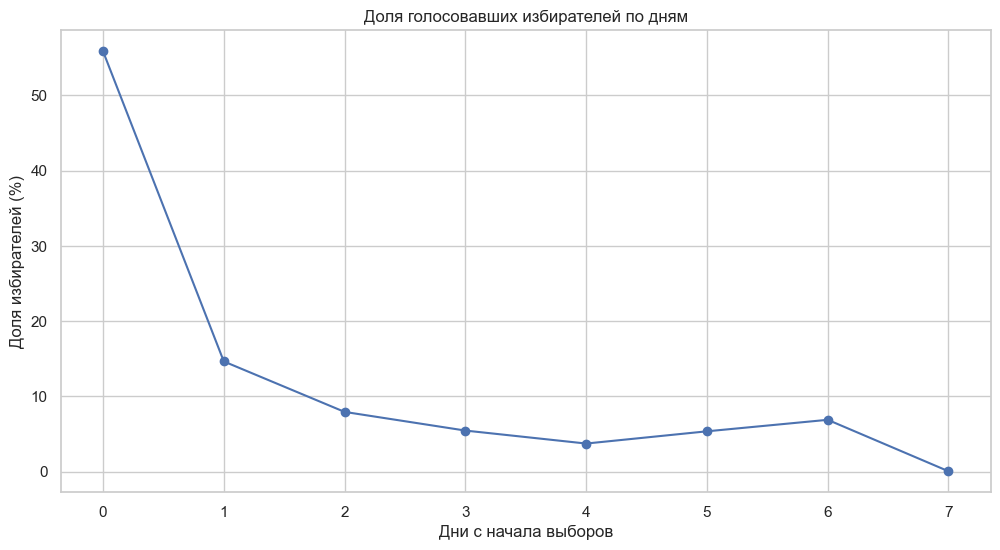

In [84]:
# Группируем данные и считаем количество голосовавших избирателей по дням
voters_count_by_days = df.groupby('lt')['user'].count().reset_index()

# Вычисляем общее количество избирателей
total_voters = voters_count_by_days['user'].sum()

# Вычисляем доли (проценты) избирателей по дням
voters_count_by_days['percentage'] = (voters_count_by_days['user'] / total_voters) * 100

# Создаем график линии с долями на оси Y
plt.figure(figsize=(12, 6))  # Размер графика

plt.plot(voters_count_by_days['lt'], voters_count_by_days['percentage'], marker='o', linestyle='-')
plt.title('Доля голосовавших избирателей по дням')
plt.xlabel('Дни с начала выборов')
plt.ylabel('Доля избирателей (%)')
plt.grid(True)  # Включаем сетку на графике

plt.show()  # Отображаем график

**Визуализация наглядно демонстрирует, что абсолютное большинство пользователей (примерно 55%) предпочитали отдавать свои голоса в первые сутки после начала голосования, потом на графике все достаточно стабильно, а вот ближе к окончанию выборов вновь видно увеличение активности пользователей (на 6-ые сутки), так как те, кто еще не успели проголосавать, стремились внести свой вклад в результаты голосования.**

# Общий вывод по проведенному исследованию

**Нами был исследован датасет с информацией по выборам в комиссию Википедии, обладающую правами бана/разбана спорных статей или некоторых пользователей. Сначала нами была проведена работа по предобработке данных и подготовке их к анализу (переименование столбцов, изменение типа данных по необходимости, удаление лишних символов, проверка на наличие дубликатов в данных). <br>Приступив непосредственно к исследовательскому анализу данных нами было установлено, что преобладающее большинство пользователей сделали более чем по 15 тыс. правок, отменили более 25 тыс. чужих правок. Также мы определили, что очень многие пользователи добавили себе порядка 17,5 тыс. килобайт информации, и они провели в сервисе порядка 50-ти часов. Активнее всего голосовали в 2009-м и 2021-м годах; чаще голосующие голосовали "за" чем "против"; большинство избирателей предпочитали отдавать свой голос в первые сутки после начала выборов, в последние сутки количество голосующих немного увеличивалось, т.к. по-видимому некоторые люди пытались успеть проголосовать в последний момент. <br>Самыми голосующими пользователями за весь исследуемый период были Vladimir Solovjev, NBS и Schekinov Alexey Victorovich. <br>По скорости внесения правок отличился пользователь с ником TakingOver (76 правок в час!), а несколько пользователей поделили между собой второе место (60 правок в час). <br>Максимальное количество правок (56001 шт.) внес Q-bit array, замыкает Топ-10 Valdis72 с 8272 правками. <br>Далее мы сегментировали пользователей по различным критериям. <br>Преобладают "неактивные избиратели" с количеством голосов до 500 (таких 718 человек), меньше всего людей попало в категорию "очень активных избирателей" - 101 человек. <br>Большинство пользователей (932 человека) оставались активными на последние годы, но некоторые не проявляли активность с 2004 года ("бывшие пользователи" - 52 человека), а некоторые после 2008 года ("старые пользователи" - 88 человек). <br>У нас получилось 384 человека с общим количеством правок до 50000; 289 человек с количеством правок от 50001 до 300000 и 399 человек с большим количеством правок (от 300001 правки). <br>Далее мы установили частоту участия в голосованиях по избирателям и установили, что в среднем каждый избиратель голосовал по 82 раза в месяц. <br>В среднем каждый пользователь вносил по 18 правок в месяц за изучаемый период. <br> Мы установили, что в нашем датасете представлена информация по 30-ти выборам, которые проходили в промежуток между ноябрем 2008 года и августом 2023 года. За весь изучаемый период в качестве кандидатов выступало 227 человек. <br> Первое место по частоте избрания поделили между собой Sir Shurf и Vladimir Solovjev, их избирали в качестве членов комисии целых 8 раз! Также несильно отстал от них и пользователь Biathlon с семью избраниями.<br> В седьмой выборной кампании мы можем увидеть необычную динамику в третьи сутки с начала голосования - для большинства кандидатов, за которых обычно было больше голосов "за", в эти сутки преобладали голоса "против". И вообще в эти сутки избиратели больше голосовали против кандидатов, нежели за них. <br>Абсолютное большинство избирателей - 77% - относятся к конформистам - они поддерживали кандидата, когда видели, что он приближается к победе. <br>Абсолютное большинство пользователей (примерно 55%) предпочитали отдавать свои голоса в первые сутки после начала голосования, а вот ближе к окончанию выборов вновь видно увеличение активности пользователей (на 6-ые сутки), так как те, кто еще не успели проголосавать, стремились внести свой вклад в результаты голосования.**